# Lateral inhibition

We create a striatal network, then place two spherical symmetric population units with radie ```r``` containing ```N_pop``` neurons each at a distance ```d``` from each other.

We stimulate the two populations first A, then B, then A and B together and investigate the firing frequency of the two populations.

In [1]:
import os
import numpy as np
network_path = "second_lateral"
snudda_data = "../../../../BasalGangliaData/data"

modified_network_file=os.path.join(network_path, "network-synapses-virtual.hdf5")
duration=5

In [2]:
from snudda import SnuddaInit

n_DSPN = 2000
n_ISPN = 2000
n_FS = 0
n_LTS = 0
n_ChIN = 0

si = SnuddaInit(network_path=network_path, snudda_data=snudda_data, random_seed=12345, honor_stay_inside=False)
si.define_striatum(num_dSPN=n_DSPN, num_iSPN=n_ISPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                   volume_type="cube")

# The centre of the cube is [0.00475, 0.004, 0.00775]. num_neurons is optional
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([0,50e-6,150e-6]),
                               probability_function="(d < 200e-6)*1", num_neurons=20)
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([150e-6,0,0]),
                               probability_function="(d < 200e-6) * 1", num_neurons=20)
 
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
Writing second_lateral/network-config.json


In [3]:
from snudda import Snudda
sn = Snudda(network_path=network_path)
sn.place_neurons()

Placing neurons
Network path: second_lateral
Creating missing directory second_lateral/log
Created directory second_lateral/log
Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json
Generating 15184 points for second_lateral/mesh/Striatum-cube-mesh-0.0003676388257808005.obj
n_points = 14455, previous close_pairs = 24930
n_points = 13765, previous close_pairs = 20312
n_points = 13114, previous close_pairs = 16764
n_points = 12501, previous close_pairs = 13866
n_points = 11927, previous close_pairs = 11590
n_points = 11391, previous close_pairs = 9640
n_points = 10893, previous close_pairs = 8133
n_points = 10436, previous close_pairs = 6743
n_points = 10019, previous close_pairs = 5618
n_points = 9640, previous close_pairs = 4821
n_points = 9299, previous close_pairs = 4102
n_points = 8994, previous close_pairs = 3458
n_points = 8725, previous close_pairs = 2886
n_points = 8623, previous close_pairs = 2392
n_points = 6429, previous close_pairs = 2

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons


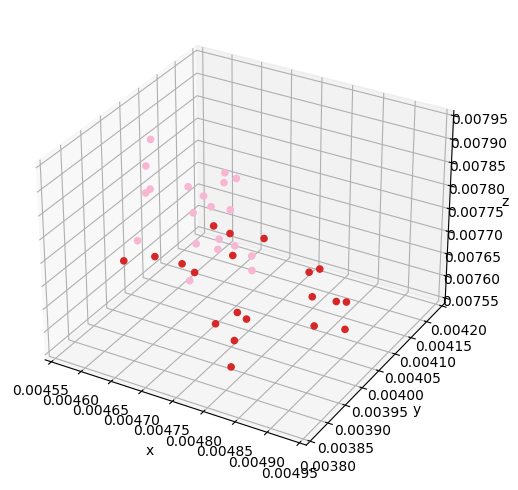

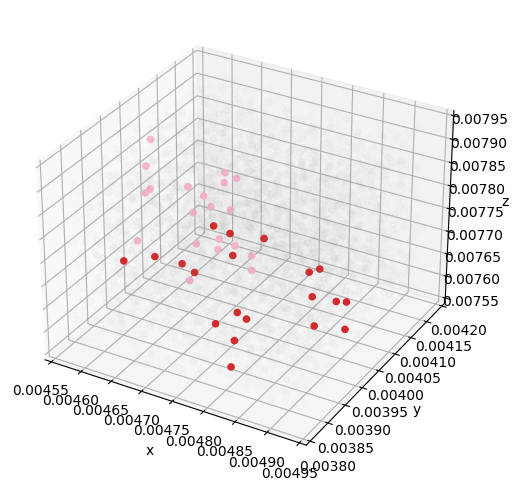

In [4]:
from snudda.plotting import PlotNetwork
pos_file = os.path.join(network_path, "network-neuron-positions.hdf5")

pn = PlotNetwork(pos_file)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [5]:
os.system("../start_ipcluster.sh")

Sleeping 20 seconds to wait for workers to start


2023-11-24 11:37:48.980 [IPClusterStart] Starting ipcluster with [daemonize=False]
2023-11-24 11:37:49.230 [IPController] Hub listening on tcp://127.0.0.1:49935 for registration.
2023-11-24 11:37:49.231 [IPController] Hub using DB backend: DictDB
2023-11-24 11:37:49.488 [IPController] hub::created hub
2023-11-24 11:37:49.489 [IPController] writing connection info to /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json
2023-11-24 11:37:49.490 [IPController] writing connection info to /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-engine.json
2023-11-24 11:37:49.491 [IPController] task::using Python leastload Task scheduler
2023-11-24 11:37:49.527 [broadcast-0] BroadcastScheduler 0 started
2023-11-24 11:37:49.527 [task] Task scheduler started [leastload]
2023-11-24 11:37:49.527 [IPController] Heartmonitor beating every 3000ms
2023-11-24 11:37:49.530 [broadcast

2023-11-24 11:37:51.237 [IPController] client::client b'1b14f502-10459be75440b85ba1d7fb20' requested 'registration_request'
2023-11-24 11:37:51.237 [IPController] registration::accepting registration 7:1b14f502-10459be75440b85ba1d7fb20
2023-11-24 11:37:51.244 [KernelNanny.4] Starting kernel nanny for engine 4, pid=46289, nanny pid=46332
2023-11-24 11:37:51.244 [KernelNanny.4] Nanny watching parent pid 46289.
2023-11-24 11:37:51.261 [IPEngine] WARNING | debugpy_stream undefined, debugging will not be enabled
2023-11-24 11:37:51.266 [IPEngine] Starting to monitor the heartbeat signal from the hub every 3500 ms.
2023-11-24 11:37:51.266 [IPEngine] Completed registration with id 4
2023-11-24 11:37:51.234 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2023-11-24 11:37:51.234 [IPEngine] WARNING | Not using CurveZMQ security
2023-11-24 11:37:51.235 [IPEngine] Registering with controller at tcp://127.0.0.1:49935
2023-11-24 11:37:51.238 [IPEngine] Shell_addrs: ['tcp://127.0.0.1:593

To stop ipcluster use:   ipcluster stop


0

In [6]:
sn.touch_detection(parallel=True)

Touch detection
Network path: second_lateral
Creating missing directory second_lateral/voxels
Created directory second_lateral/voxels
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json


2023-11-24 11:38:08.821 [IPController] client::client b'\x00k\x8bEk' requested 'connection_request'
2023-11-24 11:38:08.822 [IPController] client::client [b'\x00k\x8bEk'] connected
2023-11-24 11:38:08.994 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_1' to 0
2023-11-24 11:38:08.994 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_2' to 1
2023-11-24 11:38:08.995 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_3' to 2
2023-11-24 11:38:08.995 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_4' to 3
2023-11-24 11:38:08.995 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_5' to 4
2023-11-24 11:38:08.996 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c583026

importing SnuddaDetect from snudda.detect.detect on engine(s)


2023-11-24 11:38:11.907 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2023-11-24 11:38:11.944 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2023-11-24 11:38:11.988 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_6' completed on 5
2023-11-24 11:38:11.990 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_1' completed on 0
2023-11-24 11:38:12.010 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2023-11-24 11:38:12.030 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_4' completed on 3
2023-11-24 11:38:12.047 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2023-11-24 11:38:12.063 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_5' completed on 4
2023-11-24 11:38:12.196 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2023-11-24 11:38:12.208 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_3' completed on 2


2023-11-24 11:38:12.505 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_32' completed on 7
2023-11-24 11:38:12.506 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_30' completed on 5
2023-11-24 11:38:12.503 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).
2023-11-24 11:38:12.578 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_39
2023-11-24 11:38:12.583 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_47
2023-11-24 11:38:12.591 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_55
2023-11-24 11:38:12.576 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_37
2023-11-24 11:38:12.584 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_45
2023-11-24 11:38:12.592 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_53
2023-11-24 11:38:12.576 [IPEngine] Handling apply_reques

2023-11-24 11:38:19.647 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_55' completed on 6
2023-11-24 11:38:20.140 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_53' completed on 4
2023-11-24 11:38:20.155 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_52' completed on 3
2023-11-24 11:38:20.237 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_51' completed on 2
2023-11-24 11:38:20.293 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_54' completed on 5
2023-11-24 11:38:20.297 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_50' completed on 1
2023-11-24 11:38:20.374 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_57
2023-11-24 11:38:20.382 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_65
2023-11-24 11:38:20.391 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_73
2023-11-24

2023-11-24 11:38:20.824 [IPClusterStart] Engines appear to have started successfully
2023-11-24 11:38:32.858 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_94' completed on 5
2023-11-24 11:38:33.057 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_93' completed on 4
2023-11-24 11:38:33.230 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_90' completed on 1
2023-11-24 11:38:33.295 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_91' completed on 2
2023-11-24 11:38:33.312 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_95' completed on 6
2023-11-24 11:38:33.267 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).
2023-11-24 11:38:33.362 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).
2023-11-24 11:38:33.383 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_89' completed on 0
2023-11-24 11:38:33.502 [IPEngi

importing ProjectionDetection from snudda.detect.projection_detection on engine(s)


2023-11-24 11:38:35.286 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_119
2023-11-24 11:38:35.294 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_127
2023-11-24 11:38:35.301 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_135
2023-11-24 11:38:35.285 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_115
2023-11-24 11:38:35.293 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_123
2023-11-24 11:38:35.301 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_131
2023-11-24 11:38:35.308 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_139
2023-11-24 11:38:35.313 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_147
2023-11-24 11:38:35.319 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_155
2023-11-24 11:38:35.325 [IPEngine] Handling execute_request: 87

Suppressing printouts for hyper voxels that complete in < 100 seconds.


2023-11-24 11:39:13.986 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_232' completed on 7
2023-11-24 11:39:14.069 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_233' to 7
2023-11-24 11:39:14.103 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_233' completed on 7
2023-11-24 11:39:14.105 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_234' to 7
2023-11-24 11:39:14.108 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_234' completed on 7
2023-11-24 11:39:14.068 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_233
2023-11-24 11:39:14.105 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_234
2023-11-24 11:39:14.127 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_235
2023-11-24 11:39:14.129 [IPController] queue::client b'\x0

2023-11-24 11:40:16.062 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_247' completed on 6
2023-11-24 11:40:16.070 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_257' to 6
2023-11-24 11:40:16.073 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_257' completed on 6
2023-11-24 11:40:16.076 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_258' to 6
2023-11-24 11:40:16.076 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_259' to 6
2023-11-24 11:40:16.072 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_257
2023-11-24 11:40:16.077 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_258
2023-11-24 11:40:16.090 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_258' completed on 6
2023-11-24 11:40:16.

2023-11-24 11:40:33.326 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_271' completed on 7
2023-11-24 11:40:33.327 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_281' to 7
2023-11-24 11:40:33.332 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_281' completed on 7
2023-11-24 11:40:33.332 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_282' to 7
2023-11-24 11:40:33.333 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_283' to 7
2023-11-24 11:40:33.335 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_282' completed on 7
2023-11-24 11:40:33.328 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_281
2023-11-24 11:40:33.334 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_282
2023-11-24 11:40:33.

HyperID 44 completed - 3058800 synapses found (120.1 s)


2023-11-24 11:40:35.441 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_229' completed on 4
2023-11-24 11:40:35.465 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_287' to 4
2023-11-24 11:40:35.469 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_287' completed on 4
2023-11-24 11:40:35.471 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_288' to 4
2023-11-24 11:40:35.473 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_288' completed on 4
2023-11-24 11:40:35.512 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_289' to 4
2023-11-24 11:40:35.466 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_287
2023-11-24 11:40:35.472 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_288
2023-11-24 11:40:35.

2023-11-24 11:40:41.012 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_314
2023-11-24 11:40:41.016 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_315
2023-11-24 11:40:41.028 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_316
2023-11-24 11:40:40.972 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_301' completed on 4
2023-11-24 11:40:40.983 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_311' to 4
2023-11-24 11:40:40.986 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_311' completed on 4
2023-11-24 11:40:40.989 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_312' to 4
2023-11-24 11:40:40.989 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_313' to 4
2023-11-24 11:40:40.989 [IPCon

HyperID 85 completed - 3283994 synapses found (127.6 s)


2023-11-24 11:40:42.915 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_332
2023-11-24 11:40:42.920 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_333
2023-11-24 11:40:42.921 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_334
2023-11-24 11:40:42.913 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_322' completed on 7
2023-11-24 11:40:42.914 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_332' to 7
2023-11-24 11:40:42.918 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_332' completed on 7
2023-11-24 11:40:42.919 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_333' to 7
2023-11-24 11:40:42.920 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_334' to 7
2023-11-24 11:40:42.921 [IPCon

2023-11-24 11:40:44.654 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_359
2023-11-24 11:40:44.667 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_360
2023-11-24 11:40:44.669 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_361
2023-11-24 11:40:44.653 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_346' completed on 6
2023-11-24 11:40:44.654 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_359' to 6
2023-11-24 11:40:44.655 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_349' completed on 7
2023-11-24 11:40:44.656 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_359' completed on 6
2023-11-24 11:40:44.666 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_360' to 6
2023-11-24 11:40:44.666 [IPController] queue::client b'\x0

2023-11-24 11:40:45.685 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_392
2023-11-24 11:40:45.650 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_389
2023-11-24 11:40:45.684 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_390
2023-11-24 11:40:45.685 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_391
2023-11-24 11:40:45.620 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_385' completed on 7
2023-11-24 11:40:45.627 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_386' to 7
2023-11-24 11:40:45.629 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_386' completed on 7
2023-11-24 11:40:45.633 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_373' completed on 4
2023-11-24 11:40:45.644 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a50

2023-11-24 11:40:46.604 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_409' completed on 6
2023-11-24 11:40:46.606 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_416' to 6
2023-11-24 11:40:46.654 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_419
2023-11-24 11:40:46.671 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_420
2023-11-24 11:40:46.672 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_421
2023-11-24 11:40:46.607 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_416
2023-11-24 11:40:46.632 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_417
2023-11-24 11:40:46.654 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_418
2023-11-24 11:40:46.671 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_422
2023-11-24 11:40:

2023-11-24 11:40:47.192 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_438' completed on 6
2023-11-24 11:40:47.226 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_421' completed on 3
2023-11-24 11:40:47.228 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_440' to 3
2023-11-24 11:40:47.230 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_440' completed on 3
2023-11-24 11:40:47.233 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_441' to 3
2023-11-24 11:40:47.233 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_442' to 3
2023-11-24 11:40:47.235 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_441' completed on 3
2023-11-24 11:40:47.233 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_441
2023-11-

2023-11-24 11:40:47.966 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_470
2023-11-24 11:40:47.980 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_471
2023-11-24 11:40:47.981 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_472
2023-11-24 11:40:47.964 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_454' completed on 5
2023-11-24 11:40:47.966 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_470' to 5
2023-11-24 11:40:47.968 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_470' completed on 5
2023-11-24 11:40:47.979 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_471' to 5
2023-11-24 11:40:47.979 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_472' to 5
2023-11-24 11:40:47.981 [IPCon

2023-11-24 11:40:48.529 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_492
2023-11-24 11:40:48.542 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_493
2023-11-24 11:40:48.546 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_494
2023-11-24 11:40:48.529 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_492' to 5
2023-11-24 11:40:48.531 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_492' completed on 5
2023-11-24 11:40:48.540 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_484' completed on 7
2023-11-24 11:40:48.542 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_493' to 7
2023-11-24 11:40:48.543 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_493' completed on 7
2023-11-24 11:40:48.546 [IPController] queue::client b'\x00\

HyperID 50 completed - 6944983 synapses found (171.1 s)


2023-11-24 11:41:26.466 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_495
2023-11-24 11:41:26.464 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_227' completed on 2
2023-11-24 11:41:26.466 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_495' to 2
2023-11-24 11:41:26.469 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_495' completed on 2
2023-11-24 11:41:26.471 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_496' to 2
2023-11-24 11:41:26.476 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_496' completed on 2
2023-11-24 11:41:26.471 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_496
2023-11-24 11:41:27.834 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).


HyperID 80 completed - 7334460 synapses found (178.5 s)


2023-11-24 11:41:33.885 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_497
2023-11-24 11:41:33.891 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_498
2023-11-24 11:41:33.881 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_226' completed on 1
2023-11-24 11:41:33.885 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_497' to 1
2023-11-24 11:41:33.887 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_497' completed on 1
2023-11-24 11:41:33.890 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_498' to 1
2023-11-24 11:41:33.893 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_498' completed on 1


HyperID 86 completed - 16836354 synapses found (274.9 s)
Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json


2023-11-24 11:43:10.329 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_225' completed on 0
2023-11-24 11:43:10.337 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_499' to 0
2023-11-24 11:43:10.339 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_499' completed on 0
2023-11-24 11:43:10.342 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_500' to 0
2023-11-24 11:43:10.344 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_500' completed on 0
2023-11-24 11:43:10.337 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_499
2023-11-24 11:43:10.342 [IPEngine] Handling apply_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_500
2023-11-24 11:43:10.457 [IPEngine] Handling execute_request: 87a5086e-dcfb5c5830267c5b9d39a7fb_46131_508
2023-11-24 11:43:10.454 [IPEngine] Handling execute_reques

stop_parallel disabled, to keep pool running.

Program run time: 323.6s


2023-11-24 11:43:10.905 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_508' completed on 7
2023-11-24 11:43:10.905 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_507' completed on 6
2023-11-24 11:43:10.906 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_505' completed on 4
2023-11-24 11:43:10.925 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_506' completed on 5
2023-11-24 11:43:10.931 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_504' completed on 3
2023-11-24 11:43:10.945 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_502' completed on 1


(<snudda.detect.detect.SnuddaDetect at 0xffff28e5e820>,
 <snudda.detect.project.SnuddaProject at 0xffff15bcb970>)

In [7]:
sn.prune_synapses(parallel=True)

2023-11-24 11:43:10.977 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_503' completed on 2
2023-11-24 11:43:10.990 [IPController] queue::request '87a5086e-dcfb5c5830267c5b9d39a7fb_46131_501' completed on 0
2023-11-24 11:43:11.012 [IPController] client::client b'\x00k\x8bEl' requested 'connection_request'
2023-11-24 11:43:11.012 [IPController] client::client [b'\x00k\x8bEl'] connected
2023-11-24 11:43:11.140 [IPEngine] Handling apply_request: 5d915d55-cc602e33912e01f5b6097769_46131_1
2023-11-24 11:43:11.135 [IPEngine] Handling apply_request: 5d915d55-cc602e33912e01f5b6097769_46131_5


Prune synapses
Network path: second_lateral
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

No file second_lateral/pruning_merge_info.json
importing SnuddaPrune from snudda.detect.prune on engine(s)


2023-11-24 11:43:11.134 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_1' to 0
2023-11-24 11:43:11.134 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_2' to 1
2023-11-24 11:43:11.135 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_3' to 2
2023-11-24 11:43:11.135 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_4' to 3
2023-11-24 11:43:11.136 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_5' to 4
2023-11-24 11:43:11.136 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_6' to 5
2023-11-24 11:43:11.136 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_7' to 6
2023-11-24 11

2023-11-24 11:43:11.345 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_26' completed on 1
2023-11-24 11:43:11.347 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_29' completed on 4
2023-11-24 11:43:11.349 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_25' completed on 0
2023-11-24 11:43:11.352 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_32' completed on 7
2023-11-24 11:43:11.389 [IPEngine] Handling apply_request: 5d915d55-cc602e33912e01f5b6097769_46131_33
2023-11-24 11:43:11.404 [IPEngine] Handling execute_request: 5d915d55-cc602e33912e01f5b6097769_46131_41
2023-11-24 11:43:11.389 [IPEngine] Handling apply_request: 5d915d55-cc602e33912e01f5b6097769_46131_37
2023-11-24 11:43:11.425 [IPEngine] Handling execute_request: 5d915d55-cc602e33912e01f5b6097769_46131_45
2023-11-24 11:43:11.365 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_27' completed on 2
2023-11-24 11:43:1

2023-11-24 11:43:55.931 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_59' completed on 2
2023-11-24 11:43:55.932 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_60' completed on 3
2023-11-24 11:43:55.934 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_61' completed on 4
2023-11-24 11:43:55.945 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_58' completed on 1
2023-11-24 11:43:55.966 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_64' completed on 7
2023-11-24 11:43:55.967 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_57' completed on 0
2023-11-24 11:43:55.983 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_63' completed on 6
2023-11-24 11:43:55.984 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_62' completed on 5
2023-11-24 11:43:55.989 [IPEngine] Handling apply_request: 5d915d55-cc602e33912e01f5b609

2023-11-24 11:45:09.725 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_104' completed on 7
2023-11-24 11:45:28.874 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_97' completed on 0
2023-11-24 11:45:28.906 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_102' completed on 5
2023-11-24 11:45:29.094 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).
2023-11-24 11:45:29.684 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_103' completed on 6
2023-11-24 11:45:29.847 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_101' completed on 4
2023-11-24 11:45:29.865 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).
2023-11-24 11:45:29.948 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).
2023-11-24 11:45:33.187 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_99' completed on 2
2023-11-24 1

prune_synapses_parallel (2169156/41715509 synapses, 5.2% kept): 98.8s
prune_synapses_parallel (0/0 gapJunctions, 0.0% kept): 0.0s


2023-11-24 11:45:34.862 [IPEngine] Handling apply_request: 5d915d55-cc602e33912e01f5b6097769_46131_126
2023-11-24 11:45:34.861 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_121' to 0
2023-11-24 11:45:34.862 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_122' to 1
2023-11-24 11:45:34.862 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_123' to 2
2023-11-24 11:45:34.862 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_124' to 3
2023-11-24 11:45:34.862 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_125' to 4
2023-11-24 11:45:34.862 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_126' to 5
2023-11-24 11:45:34.863 [IPController] 

stop_parallel disabled, to keep pool running.

Program run time: 467.8s


2023-11-24 11:45:35.076 [IPEngine] Handling execute_request: 5d915d55-cc602e33912e01f5b6097769_46131_169
2023-11-24 11:45:35.073 [IPEngine] Handling execute_request: 5d915d55-cc602e33912e01f5b6097769_46131_171
2023-11-24 11:45:35.083 [IPEngine] Handling execute_request: 5d915d55-cc602e33912e01f5b6097769_46131_176
2023-11-24 11:45:35.073 [IPEngine] Handling execute_request: 5d915d55-cc602e33912e01f5b6097769_46131_172
2023-11-24 11:45:35.072 [IPEngine] Handling execute_request: 5d915d55-cc602e33912e01f5b6097769_46131_175
2023-11-24 11:45:35.073 [IPEngine] Handling execute_request: 5d915d55-cc602e33912e01f5b6097769_46131_173
2023-11-24 11:45:35.072 [IPEngine] Handling execute_request: 5d915d55-cc602e33912e01f5b6097769_46131_170
2023-11-24 11:45:35.072 [IPEngine] Handling execute_request: 5d915d55-cc602e33912e01f5b6097769_46131_174
2023-11-24 11:45:35.072 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '5d915d55-cc602e33912e01f5b6097769_46131_169' to 0
2023-11-24 11:45:

# Reduce network

Here we reduce the network by making the surrounding neurons virtual.

In [8]:
from snudda.utils.ablate_network import SnuddaAblateNetwork

ab = SnuddaAblateNetwork(network_file=network_path)
pop_unit_0 = ab.snudda_load.get_population_unit_members(population_unit=0)  # Here, surrounding neurons
pop_unit_1 = ab.snudda_load.get_population_unit_members(population_unit=1)
pop_unit_2 = ab.snudda_load.get_population_unit_members(population_unit=2)
# ab.only_keep_neuron_id(neuron_id=set(pop_unit_1).union(set(pop_unit_2)))
ab.make_virtual(pop_unit_0)
ab.write_network(out_file_name=modified_network_file)

2023-11-24 11:45:35.170 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_172' completed on 3
2023-11-24 11:45:35.171 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_176' completed on 7
2023-11-24 11:45:35.173 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_169' completed on 0
2023-11-24 11:45:35.176 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_175' completed on 6
2023-11-24 11:45:35.182 [IPController] queue::request '5d915d55-cc602e33912e01f5b6097769_46131_170' completed on 1


Writing to second_lateral/network-synapses-virtual.hdf5
Copying morphologies
Keeping 4000 neurons.
Making neuron id 0 (dSPN_0) virtual (old ID 0)
Making neuron id 1 (dSPN_0) virtual (old ID 1)
Making neuron id 2 (dSPN_0) virtual (old ID 2)
Making neuron id 3 (dSPN_0) virtual (old ID 3)
Making neuron id 4 (dSPN_1) virtual (old ID 4)
Making neuron id 5 (dSPN_1) virtual (old ID 5)
Making neuron id 6 (dSPN_1) virtual (old ID 6)
Making neuron id 7 (dSPN_1) virtual (old ID 7)
Making neuron id 8 (dSPN_1) virtual (old ID 8)
Making neuron id 9 (dSPN_1) virtual (old ID 9)
Making neuron id 10 (dSPN_2) virtual (old ID 10)
Making neuron id 11 (dSPN_2) virtual (old ID 11)
Making neuron id 12 (dSPN_2) virtual (old ID 12)
Making neuron id 13 (dSPN_3) virtual (old ID 13)
Making neuron id 14 (dSPN_3) virtual (old ID 14)
Making neuron id 15 (dSPN_3) virtual (old ID 15)
Making neuron id 16 (dSPN_3) virtual (old ID 16)
Making neuron id 17 (dSPN_3) virtual (old ID 17)
Making neuron id 18 (iSPN_0) virtual (o

0/2169156 synapses processed
2169156/2169156 synapses processed
Filtering done.
Copying synapses and gap junctions
50000 / 2169156 synapse rows parsed
100000 / 2169156 synapse rows parsed
150000 / 2169156 synapse rows parsed
200000 / 2169156 synapse rows parsed
250000 / 2169156 synapse rows parsed
300000 / 2169156 synapse rows parsed
350000 / 2169156 synapse rows parsed
400000 / 2169156 synapse rows parsed
450000 / 2169156 synapse rows parsed
500000 / 2169156 synapse rows parsed
550000 / 2169156 synapse rows parsed
600000 / 2169156 synapse rows parsed
650000 / 2169156 synapse rows parsed
700000 / 2169156 synapse rows parsed
750000 / 2169156 synapse rows parsed
800000 / 2169156 synapse rows parsed
850000 / 2169156 synapse rows parsed
900000 / 2169156 synapse rows parsed
950000 / 2169156 synapse rows parsed
1000000 / 2169156 synapse rows parsed
1050000 / 2169156 synapse rows parsed
1100000 / 2169156 synapse rows parsed
1150000 / 2169156 synapse rows parsed
1200000 / 2169156 synapse rows 

In [9]:
pop_unit_0

array([   0,    1,    2, ..., 3997, 3998, 3999])

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons


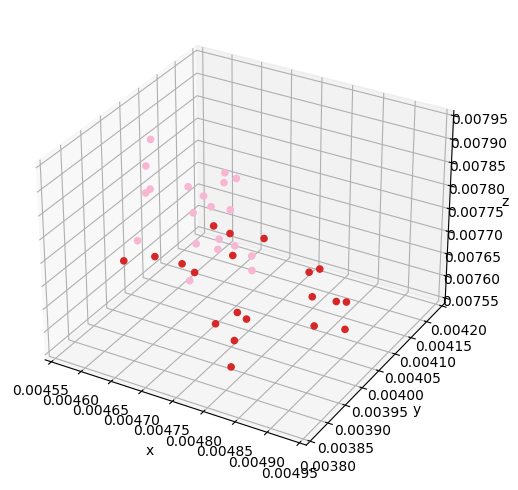

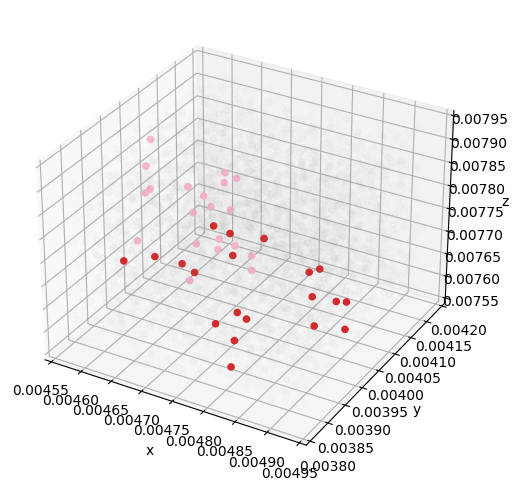

In [10]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(modified_network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [12]:
from snudda.input.virtual_input import VirtualInput
vi = VirtualInput(spike_file="virtual_input_spikes.txt", mapping_file="virtual_input_mapping.txt")

for vidx in pop_unit_0:
    vi.add_input(neuron_id=vidx, spike_times = vi.poisson_spikes(frequency=5, max_time=duration))
    
vi.write_data()

In [13]:
sn.setup_input(network_file=modified_network_file, input_config="input-virtual.json", input_time=duration, parallel=True)

Setting up inputs, assuming input.json exists
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json
Writing input spikes to second_lateral/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data from second_lateral/network-config.json


2023-11-24 11:47:26.869 [IPController] client::client b'\x00k\x8bEm' requested 'connection_request'
2023-11-24 11:47:26.870 [IPController] client::client [b'\x00k\x8bEm'] connected


importing SnuddaInput from snudda.input.input on engine(s)


2023-11-24 11:47:27.232 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131_8
2023-11-24 11:47:27.245 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131_16
2023-11-24 11:47:27.246 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131_24
2023-11-24 11:47:27.232 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131_2
2023-11-24 11:47:27.244 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131_10
2023-11-24 11:47:27.245 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131_18
2023-11-24 11:47:27.229 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131_4
2023-11-24 11:47:27.245 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131_12
2023-11-24 11:47:27.247 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131_20
2023-11-24 11:47:27.229 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929

2023-11-24 11:47:27.616 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_32' completed on 7
2023-11-24 11:47:27.619 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_29' completed on 4
2023-11-24 11:47:27.619 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_25' completed on 0
2023-11-24 11:47:27.627 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_31' completed on 6
2023-11-24 11:47:27.628 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_27' completed on 2
2023-11-24 11:47:27.632 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_26' completed on 1
2023-11-24 11:47:27.636 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_30' completed on 5
2023-11-24 11:47:27.673 [IPEngine] Handling execute_request: 178962d3-d7929d054505e4929c970fb1_46131_34
2023-11-24 11:47:27.701 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131

Writing spikes to second_lateral/input-spikes.hdf5


2023-11-24 11:47:27.949 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_56' completed on 7
2023-11-24 11:47:27.949 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_53' completed on 4
2023-11-24 11:47:27.952 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_52' completed on 3
2023-11-24 11:47:28.028 [IPEngine] Handling execute_request: 178962d3-d7929d054505e4929c970fb1_46131_60
2023-11-24 11:47:28.030 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131_68
2023-11-24 11:47:28.028 [IPEngine] Handling execute_request: 178962d3-d7929d054505e4929c970fb1_46131_62
2023-11-24 11:47:28.031 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131_70
2023-11-24 11:47:28.030 [IPEngine] Handling execute_request: 178962d3-d7929d054505e4929c970fb1_46131_59
2023-11-24 11:47:28.037 [IPEngine] Handling apply_request: 178962d3-d7929d054505e4929c970fb1_46131_67
2023-11-24 11:47:28.034 [IPEngine] Handl

stop_parallel disabled, to keep pool running.

Program run time: 581.7s


2023-11-24 11:47:29.007 [IPEngine] Handling execute_request: 178962d3-d7929d054505e4929c970fb1_46131_75
2023-11-24 11:47:29.007 [IPEngine] Handling execute_request: 178962d3-d7929d054505e4929c970fb1_46131_77
2023-11-24 11:47:29.011 [IPEngine] Handling execute_request: 178962d3-d7929d054505e4929c970fb1_46131_79
2023-11-24 11:47:29.007 [IPEngine] Handling execute_request: 178962d3-d7929d054505e4929c970fb1_46131_76
2023-11-24 11:47:29.007 [IPEngine] Handling execute_request: 178962d3-d7929d054505e4929c970fb1_46131_74
2023-11-24 11:47:29.011 [IPEngine] Handling execute_request: 178962d3-d7929d054505e4929c970fb1_46131_80
2023-11-24 11:47:29.015 [IPEngine] Handling execute_request: 178962d3-d7929d054505e4929c970fb1_46131_78
2023-11-24 11:47:29.006 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '178962d3-d7929d054505e4929c970fb1_46131_73' to 0
2023-11-24 11:47:29.007 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '178962d3-d7929d054505e4929c970fb1_461

2023-11-24 11:47:29.100 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_74' completed on 1
2023-11-24 11:47:29.101 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_75' completed on 2
2023-11-24 11:47:29.103 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_79' completed on 6
2023-11-24 11:47:29.108 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_80' completed on 7
2023-11-24 11:47:29.108 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_78' completed on 5
2023-11-24 11:47:29.109 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_76' completed on 3
2023-11-24 11:47:29.109 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_73' completed on 0
2023-11-24 11:47:29.110 [IPController] queue::request '178962d3-d7929d054505e4929c970fb1_46131_77' completed on 4


In [14]:
os.system('export IPYTHONDIR="`pwd`/.ipython" && ipcluster stop')

2023-11-24 11:47:47.953 [IPClusterStop] Stopping cluster 
2023-11-24 11:47:47.953 [IPClusterStop] Stopping controller
2023-11-24 11:47:47.953 [IPController] CRITICAL | Received signal 15, shutting down
2023-11-24 11:47:47.953 [IPController] CRITICAL | terminating children...
2023-11-24 11:47:48.057 [IPClusterStart] Controller stopped: {'exit_code': 0, 'pid': 46229, 'identifier': 'ipcontroller-46227'}
2023-11-24 11:47:48.057 [IPClusterStart] WARNING | Controller stopped. Shutting down.
2023-11-24 11:47:48.058 [IPClusterStart] ERROR | IPython cluster: stopping
2023-11-24 11:47:48.058 [IPClusterStart] Stopping engine(s): 1700822270
2023-11-24 11:47:48.066 [IPClusterStop] Stopping engine(s): 1700822270
2023-11-24 11:47:48.059 [IPEngine] CRITICAL | received signal 15, stopping
2023-11-24 11:47:48.108 [IPEngine] CRITICAL | received signal 15, stopping
2023-11-24 11:47:48.410 [IPEngine] CRITICAL | received signal 15, stopping
2023-11-24 11:47:48.460 [IPEngine] CRITICAL | received signal 15, s

0

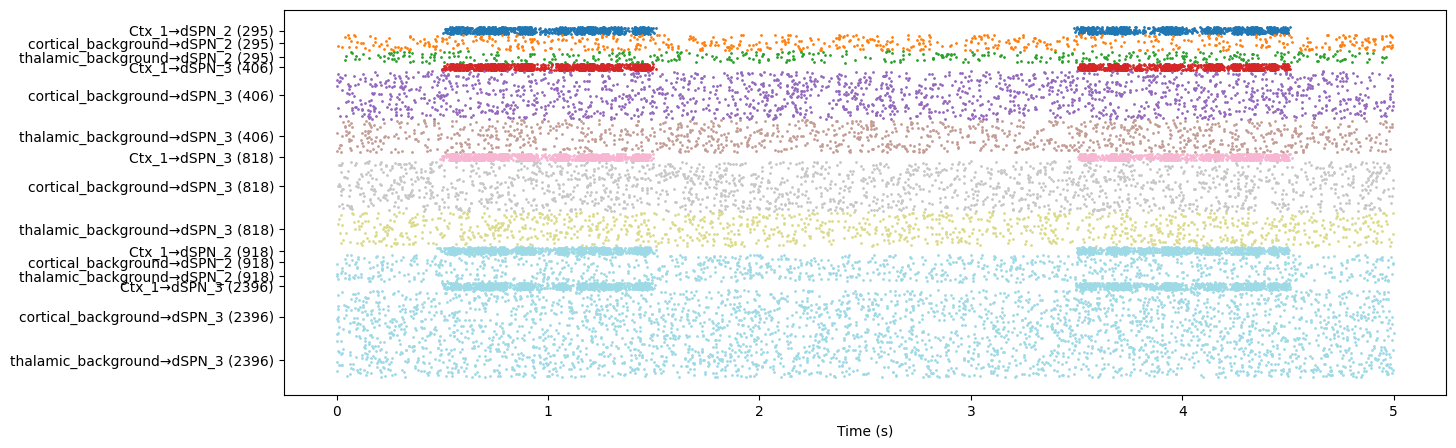

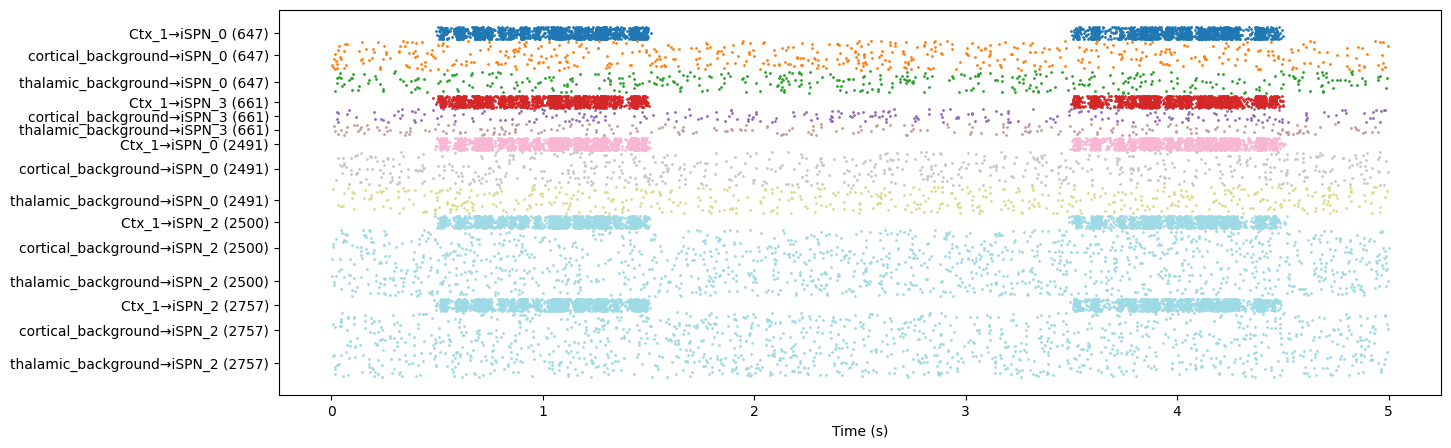

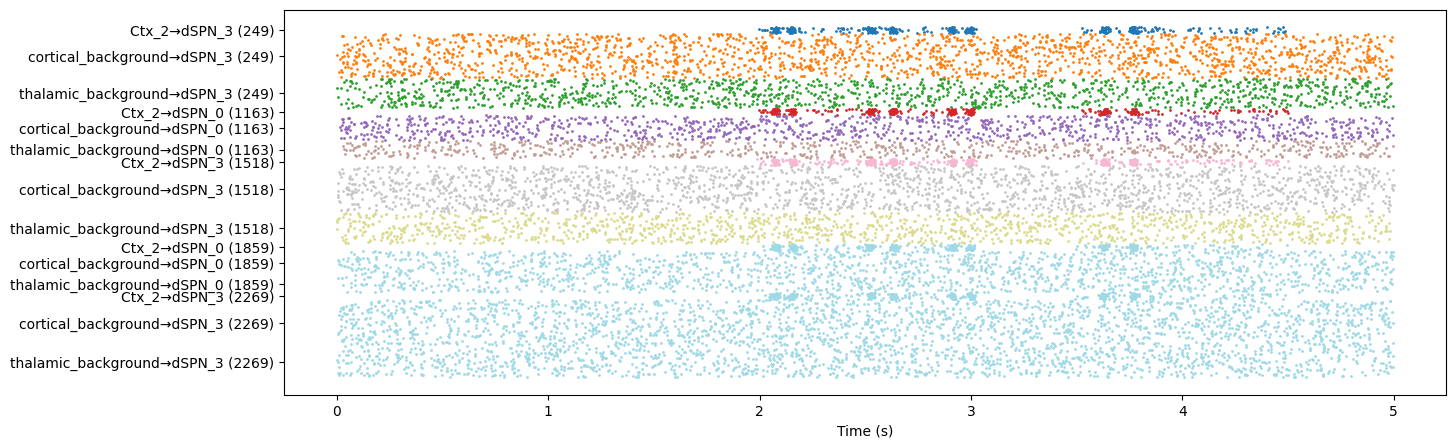

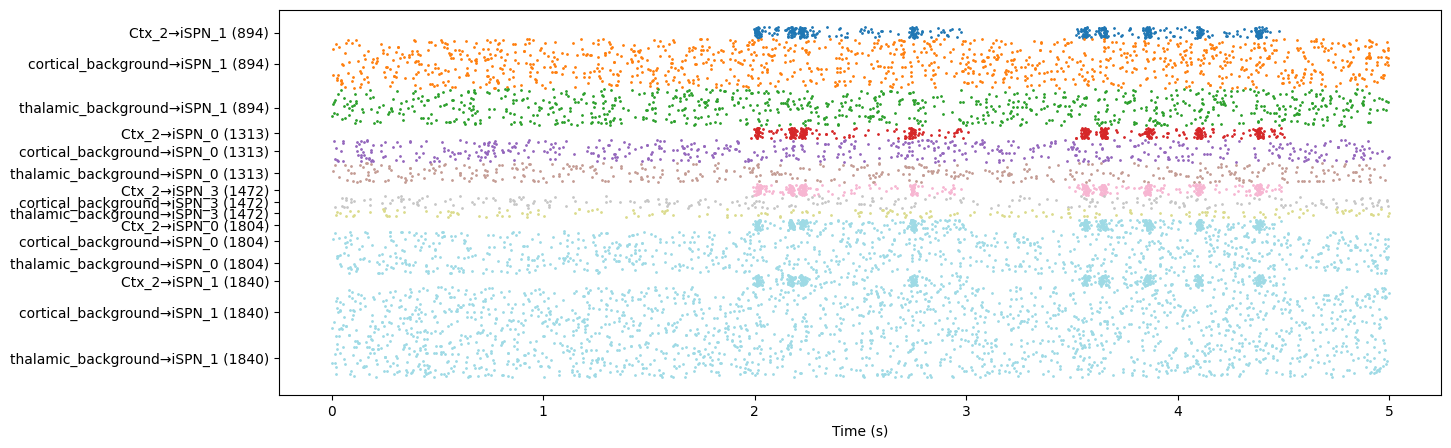

In [15]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, modified_network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=5, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=5, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=5, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=5, neuron_type="iSPN", fig_size=(15,5))

In [16]:
n_cores=8
os.system(f"mpiexec -n {n_cores} snudda simulate {network_path} --networkFile {modified_network_file} --time {duration}")

args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
numprocs=8
args: Namespace(action='simulate', path='second_lateral', network_file='second_lateral/network-synapses-virtual.hdf5', input_file=None, output_file=None, time=5.0, snudda_data=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=False, disable_gj=False, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, ipython_profile=None)
args: Namespace(action='simulate', path='second_lateral', network_file='second_lateral/network-synapses-virtual.hdf5', input_file=None, output_file=None, time=5.0, snudda_data=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=False, disable_gj=False, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, ipython_p

2 : Memory status: 56% free
5 : Memory status: 56% free
1 : Memory status: 56% free
7 : Memory status: 56% free
4 : Memory status: 56% free
0 : Memory status: 56% free
3 : Memory status: 56% free
6 : Memory status: 56% free
Added 0.0 gap junctions to simulation (0 total)
ERROR: Added only 24614 out of 2169156 synapses! (3960 virtual neurons)
ERROR: Added only 24614 out of 2169156 synapses! (3960 virtual neurons)
ERROR: Added only 24614 out of 2169156 synapses! (3960 virtual neurons)
ERROR: Added only 24614 out of 2169156 synapses! (3960 virtual neurons)
ERROR: Added only 24614 out of 2169156 synapses! (3960 virtual neurons)
ERROR: Added only 24614 out of 2169156 synapses! (3960 virtual neurons)
ERROR: Added only 24614 out of 2169156 synapses! (3960 virtual neurons)
ERROR: Added only 24614 out of 2169156 synapses! (3960 virtual neurons)
3 : Memory status: 56% free
7 : Memory status: 56% free
1 : Memory status: 56% free
5 : Memory status: 56% free
2 : Memory status: 56% free
6 : Memory s

0

Loading second_lateral/simulation/output.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 248  249  290  295  406  412  647  661  782  812  815  818  894  918
  951 1046 1163 1304 1313 1465 1471 1472 1518 1581 1779 1804 1827 1840
 1859 2051 2102 2108 2269 2352 2396 2491 2500 2691 2757 2833]
Saving figure to second_lateral/figures/spike-raster.png


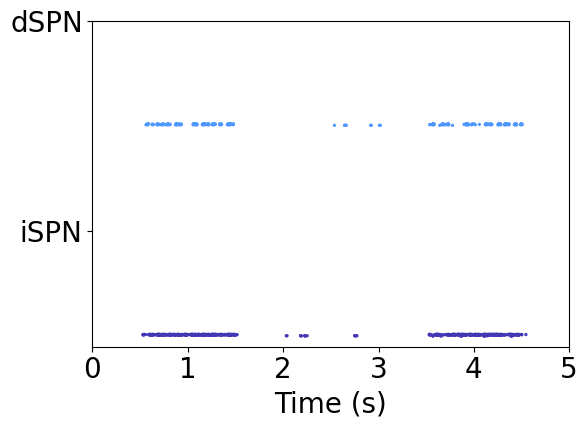

In [17]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path,
                             network_file=modified_network_file)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Saving figure second_lateral/figures/spike-frequency-pop-units0-1-2.pdf


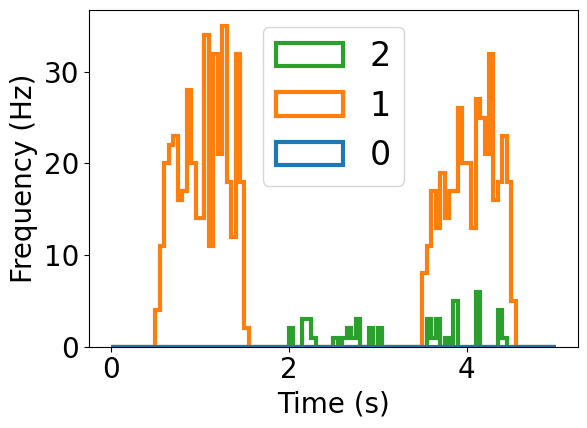

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [18]:
spr.plot_spike_histogram()